<a href="https://colab.research.google.com/github/ansal1202/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%EF%BD%9C%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# **資料概況**
1. Red Wine Quality 各欄位定義
*   fixed acidity(非揮發性酸) : 主要包含酒中的大多數酸,含量過高會導致令人不愉快的醋味
*   volatile acidity(揮發性酸) : 主要為乙酸的含量,含量過高會導致令人不愉快的醋味
*   citric acid(檸檬酸) : 少量檸檬酸可以為葡萄酒增添「新鮮度」和風味
*   residual sugar(殘留糖分) : 發酵停止後剩餘的糖分含量
*   chlorides(氯化物) : 酒中的鹽分量
*   free sulfur dioxide(游離二氧化硫) : 它可以防止微生物生長和葡萄酒氧化
*   total sulfur dioxide(總二氧化硫) : 遊離形式和結合形式的 S02 的量
*   density(密度) : 酒的密度，會因糖和酒精含量而變化
*   pH(pH值) : 描述葡萄酒的酸性或鹼性程度
*   sulphates(硫酸鹽) : 可提高二氧化硫(S02)的濃度，並起到抗菌和抗氧化劑的作用
*   alcohol(酒精濃度) : 酒的酒精含量
*   qulity(品質) : 分數介於0和10之間













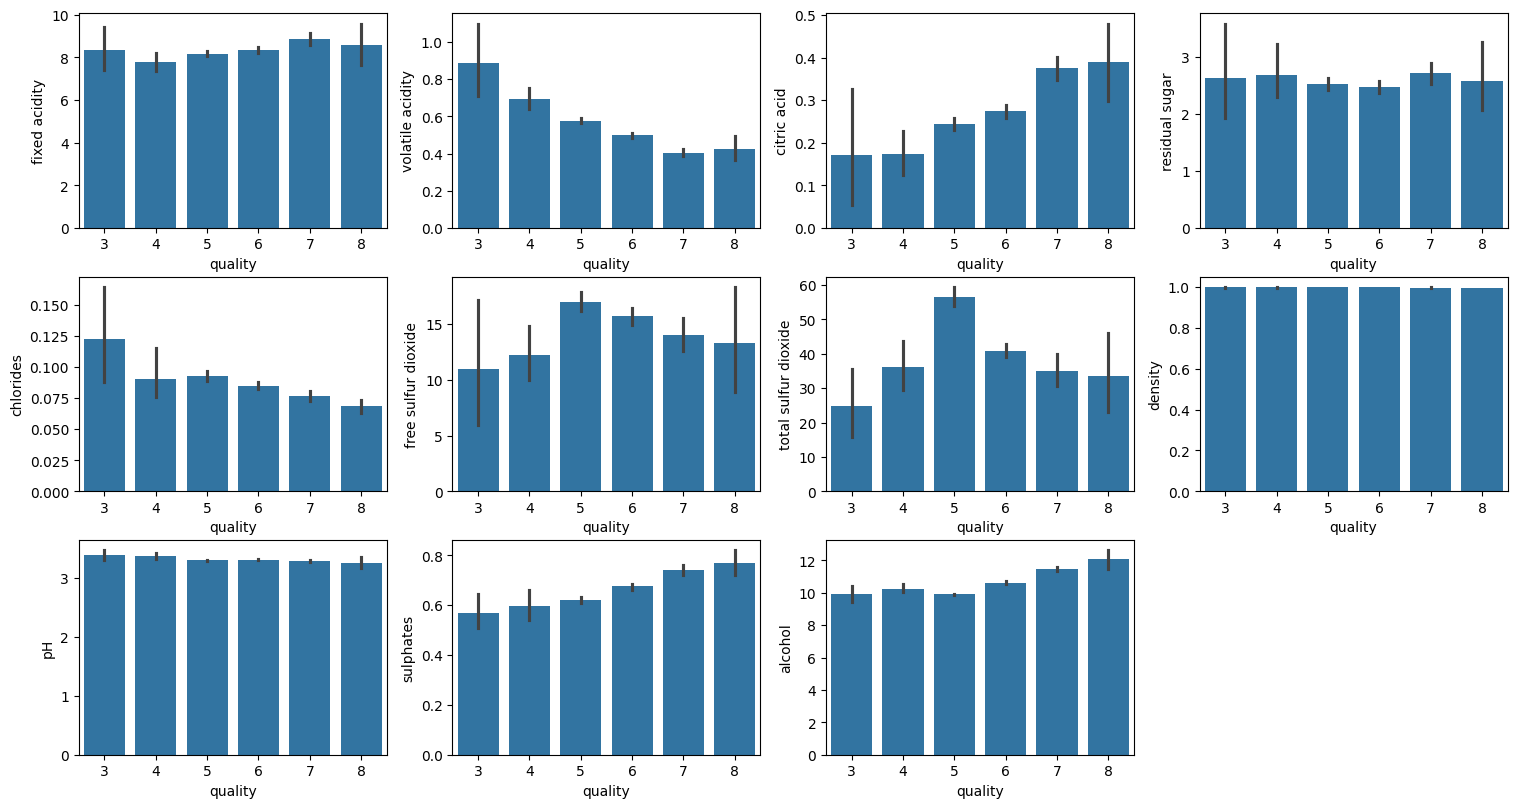

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
# 創建一個3x4的圖
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15, 8))

# 將ax攤平為一維矩陣，以利後續遍歷
ax = ax.flatten()

# 定義資料欄位的索引
column_index = 0
# Loop through each feature to plot a subplot
for i in df.columns:
 if i != 'quality':
    sns.barplot(data=df, x='quality', y=i, ax=ax[column_index])
    column_index += 1
# 刪除最後一個空白圖表
ax[-1].remove()

plt.tight_layout(pad=0.4)
plt.show()

觀察特徵之間的關係程度

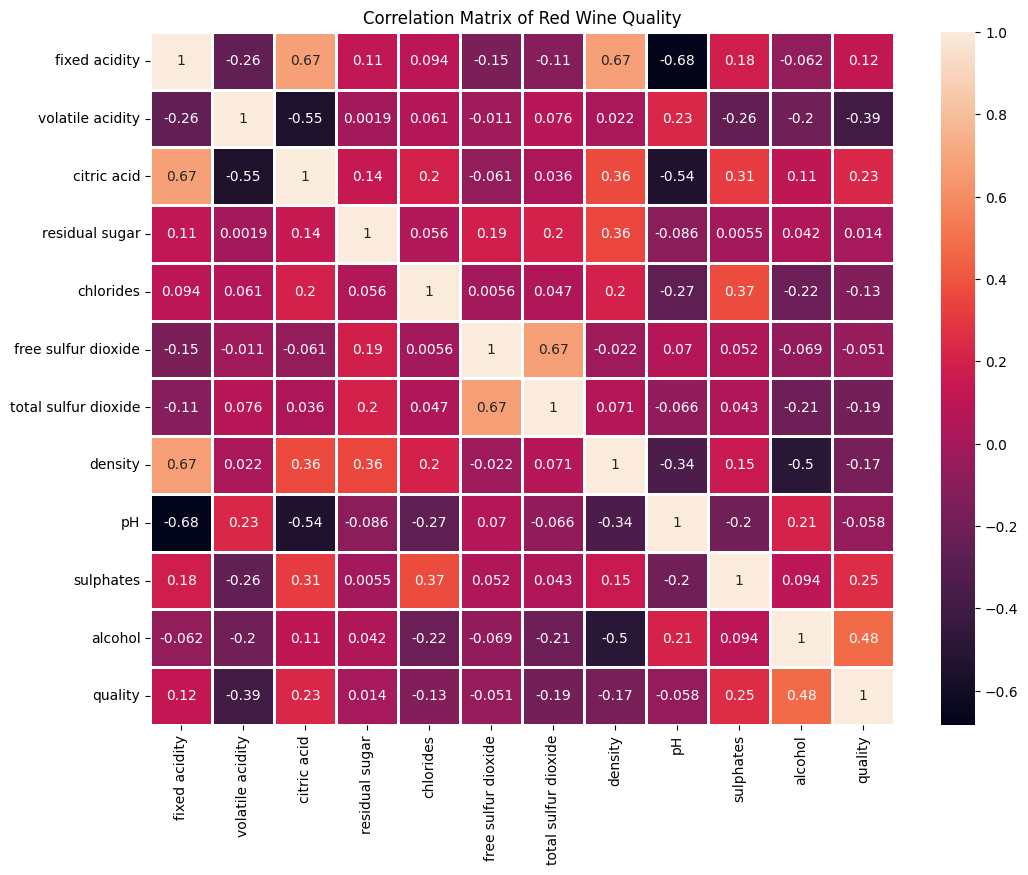

In [ ]:
plt.subplots(figsize = (12, 9))
sns.heatmap(df.corr(), annot = True, linewidth = 1)
plt.title('Correlation Matrix of Red Wine Quality')
plt.show()

觀察資料類別不平衡程度

<Axes: xlabel='quality', ylabel='count'>

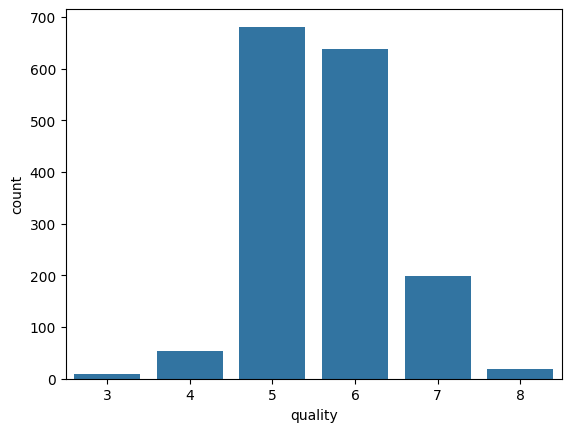

In [ ]:
# 計算不同quality的筆數並呈現其分布
df['quality'].value_counts()
sns.countplot(data=df, x='quality')

**資料清理**
* 缺失值
* 內容清理
* 型態錯誤

In [ ]:
# 確認資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# 檢查是否有缺失值
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

**轉換資料型態**

In [3]:
#原始quality介於3~8，透過二元分類區分為'好'與'壞'
#將quality二分為"good" and "bad"
bins = (0, 6.5, 10)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

<Axes: xlabel='quality'>

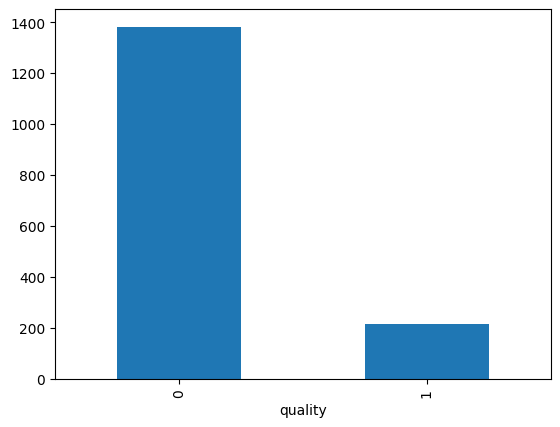

In [4]:
#使用Labelencoder將good轉為1，bad轉為0
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
#sns.countplot(data=df, x='quality')
df['quality'].value_counts().plot.bar()

 **特徵工程**

<Axes: xlabel='quality'>

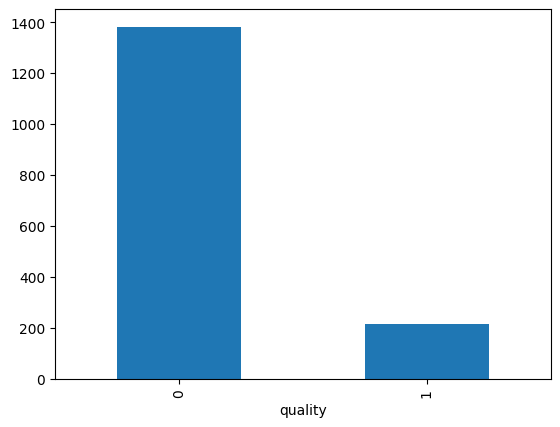

In [5]:
from sklearn.preprocessing import StandardScaler

# Standardize 資料標準化
scaler = StandardScaler()
feature_columns = df.columns.difference(["quality"])
df[feature_columns] = scaler.fit_transform(df[feature_columns])

df['quality'].value_counts().plot.bar()

標準化後似乎沒有解決資料不平衡的問題

**訓練集與測試集**

In [6]:
# 拆分訓練集與測試集
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis = 1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 43, stratify=y_train)

display(X_train.shape)
display(X_test.shape)
display(X_val.shape)

(1151, 11)

(320, 11)

(128, 11)

**訓練模型**

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)


[0.92207792 0.87826087 0.89565217 0.89565217 0.92608696]


In [14]:
#model performance
from sklearn.metrics import classification_report, accuracy_score
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

